## Unsupervised Learning Algorithms

### Clustering Analysis
- #### Kmeans Clustering Algorithm
- #### Agglomerative Hierrarchial Clustering

### Hierrarchial Clustering

- A.k.a Agglomerative clustering, does not require the user to specify the number of clusters. 
- Initially, each point is considered as a separate cluster, then it recursively clusters the points together depending upon the distance between them. 
- The points are clustered in such a way that the distance between points within a cluster is minimum and distance between the cluster is maximum. 
- Commonly used distance measures are Euclidean distance, Manhattan distance or Mahalanobis distance. Unlike k-means clustering, it is "bottom-up" approach.



Reading Reference for Clustering Algorithms -
https://scikit-learn.org/stable/modules/clustering.html#clustering

### Step1: Load Libraries

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering

### Step2: Load Data

In [31]:
df_raw = pd.read_csv("./data/world-happiness-report/2017.csv")
df_raw.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### Step3: Explore Data

In [ ]:
df_raw.describe()

In [ ]:
# Plot Correlation Heatmap to analyse correlation between continuous variables
df = df_raw[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables

fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(cor, square = True,annot=True,cmap="YlGnBu") #Plot the correlation as heat map

### Step4: Agglomorative Approach to identify clusters

- Starts with one cluster and adds items or data points closer to it in iterative manner till all the points are added to one single large cluster.
- Its a bottom up approach where clustering starts with individual points and stops at one large cluster that includes all the points.

### Main Approaches to merge data points:
- Single Link: distance between closest members of a cluster. **Most Comonly Used**
- Complete Linkage: distance between members which aqre farthest apart
- Average Linage: looking at distance between each pair and averages all those distances

In [34]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

In [35]:
clust_labels1 = doAgglomerative(df, 2)
agglomerative = pd.DataFrame(clust_labels1)
df.insert((df.shape[1]),'agglomerative',agglomerative)

In [ ]:
# Just to check if kmeans column added to the dataframe
df.tail()

In [ ]:
# Plot scatter plot
fig, (ax0,ax1) = plt.subplots(ncols= 2)
fig.set_figwidth(16)
fig.set_figheight(6)

# Scatter plots of Corruption vs GDP
scatter = ax0.scatter(df['Economy..GDP.per.Capita.'],df['Trust..Government.Corruption.'],
                     c=agglomerative[0],s=50)
ax0.set_title('Agglomerative Clustering')
ax0.set_xlabel('GDP per Capita')
ax0.set_ylabel('Corruption')

# Scatter plots of Corruption vs GDP

scatter = ax1.scatter(df['Freedom'],df['Trust..Government.Corruption.'],
                     c=agglomerative[0],s=50)
ax1.set_title('Agglomerative Clustering')
ax1.set_xlabel('Freedom')
ax1.set_ylabel('Corruption')

plt.colorbar(scatter)

In [38]:
# Convert Cluster to
df["cluster_name"] = df["agglomerative"].apply(lambda x: "cluster0" if x == 0 else "cluster1")

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
df.tail()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,agglomerative,cluster_name
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,0,cluster0
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,0,cluster0
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,0,cluster0
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,0,cluster0
154,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,0,cluster0


In [ ]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(nrows = 4)
fig.set_figwidth(16)
fig.set_figheight(24)
x = sns.boxplot(x="cluster_name", y='Freedom', data=df, ax= ax)
x = sns.swarmplot(x="cluster_name", y='Freedom', data=df,color=".25",ax= ax)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Economy..GDP.per.Capita.', data=df, ax= ax2)
x = sns.swarmplot(x="cluster_name", y='Economy..GDP.per.Capita.', data=df,color=".25",ax= ax2)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Happiness.Score', data=df, ax= ax3)
x = sns.swarmplot(x="cluster_name", y='Happiness.Score', data=df,color=".25",ax= ax3)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Family', data=df, ax= ax4)
x = sns.swarmplot(x="cluster_name", y='Family', data=df,color=".25",ax= ax4)

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
df = df.set_index('cluster_name')
del df.index.name

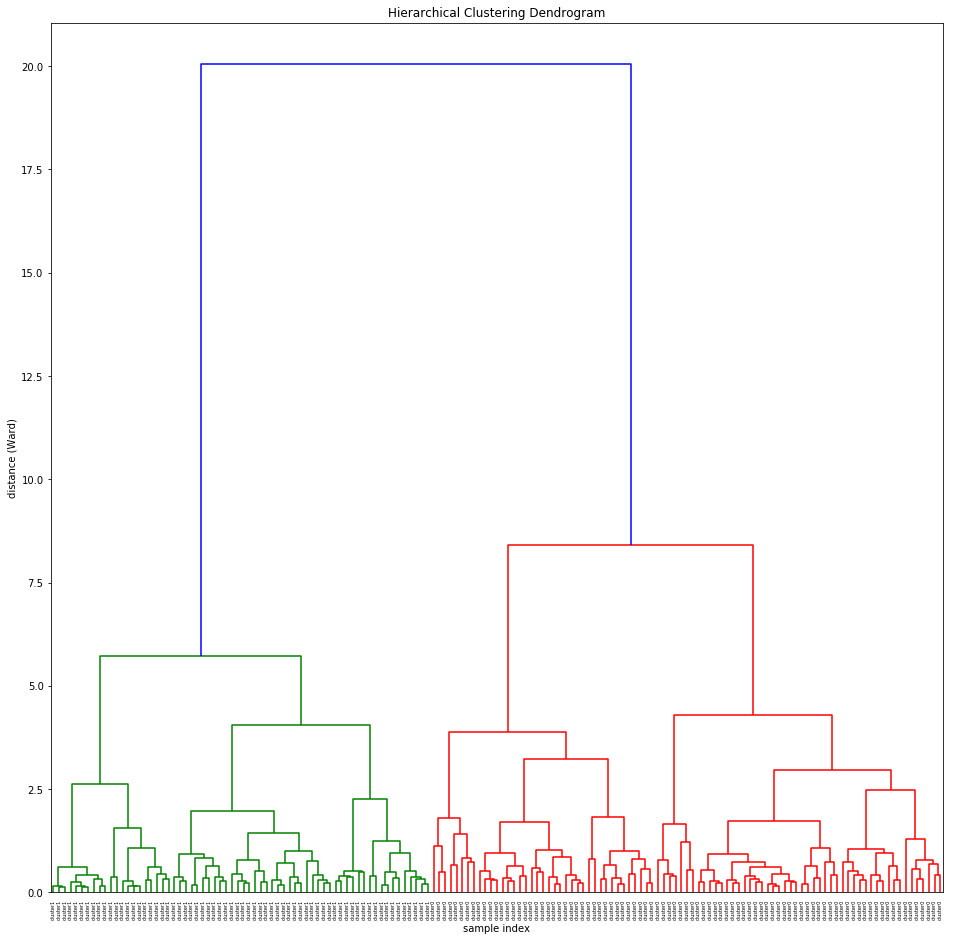

In [48]:
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Make the dendro
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dn = dendrogram(Z, labels=df.index, leaf_rotation=90)